# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan los códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** por el método de Euler implícito (B.E) y Euler explicito (F.E).

Los problemas a estudiar es:
# Condiciones de contorno Direchlet no homogéneas, material homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline


In [7]:
def EulerTheta(M,N,theta=1):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0
    Tb= lambda t : 0.*t+0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[-1] = Tb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-theta*lamb, 1+2*theta*lamb  ,-theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #definiendo la matriz B
    B = diags([(1-theta)*lamb, 1-2*(1-theta)*lamb ,(1-theta)*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b
        b = np.zeros(m-1)
        b[0] = (1-theta)*lamb*Ta(tm-dt)+theta*lamb*Ta(tm)
        b[-1] = (1-theta)*lamb*Tb(tm-dt)+theta*lamb*Tb(tm)
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = Ta(tm)
        Tamp[-1] = Tb(tm)
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()


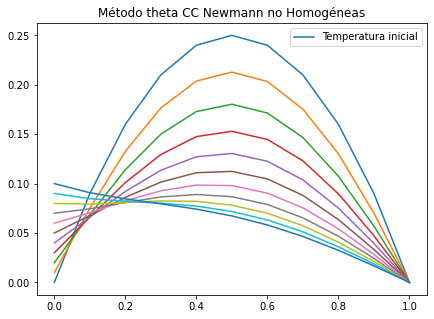

In [8]:
EulerTheta(9, 10,1)

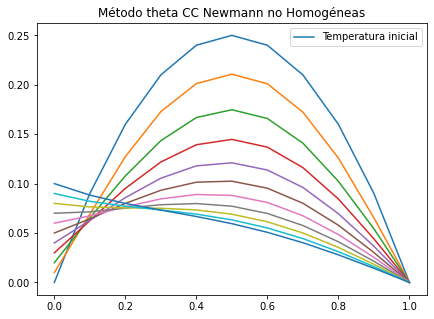

In [9]:
EulerTheta(9, 10,0.5)

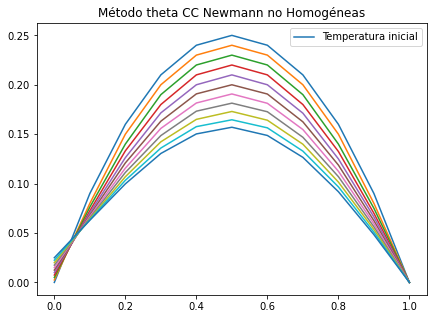

In [10]:
EulerTheta(9, 10,0)

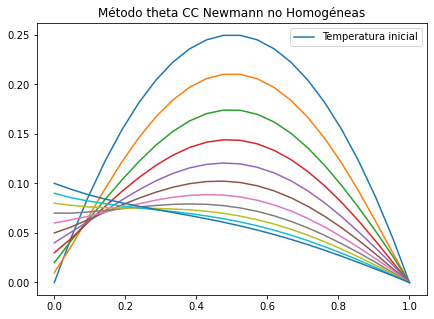

In [11]:
EulerTheta(20, 10,0.5)

# Veamos ahora el siguiente problema.
# Condiciones de contorno Direchlet no homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=g_1(t), \hspace{3mm}u(L)=g_2(t)
\end{cases}
$$

In [12]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta= lambda t : 0.1*t+0.0
    Tb= lambda t : 0.1*t+0.0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta(0)
    Tamp[-1] = Tb(0)
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1 = [1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1]) for i in range (m-1)]
    A2 = [-dt/h**2*K[2*(i+1)+1] for i in range (m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    tm=0
    for t in range(N):
        tm=tm+dt
        #definamos el vector b tal que, A*u_j = B*u_{j-1}+b(j)
        b = np.zeros(m-1)
        b[0] = dt/h**2*(K[1]*Ta(tm))
        b[-1] = dt/h**2*(K[-2]*Tb(tm))
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])+np.dot(np.linalg.inv(A),b)
        Tamp[0] = Ta(tm)
        Tamp[-1] = Tb(tm)
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito CC no Homogéneas')
    plt.show()



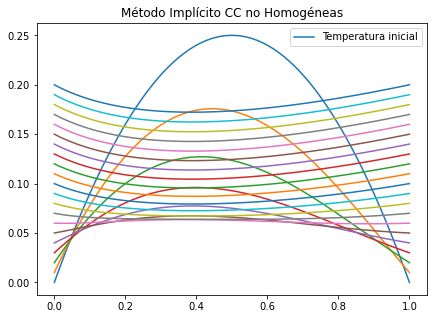

In [13]:
PrbkVariable(99,20)

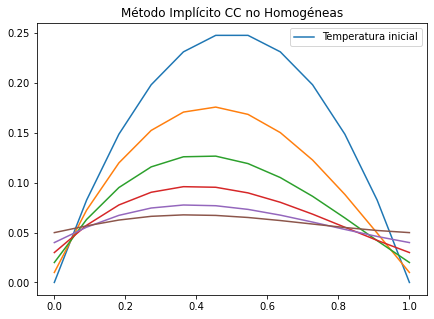

In [14]:
PrbkVariable(10,5)

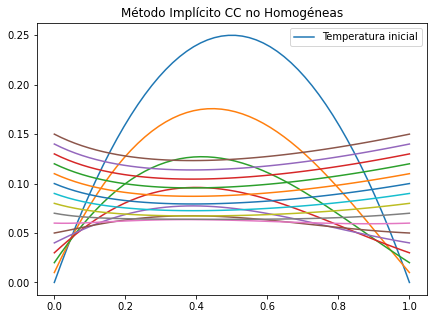

In [15]:
PrbkVariable(50,15)